<a href="https://colab.research.google.com/github/FuturisticLover123/InnowiseInternship/blob/main/task1/dqc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
kaggle_token = {"username":"arseniyatrushkevich",
 "key":"546c397b87b27d9af5160bae671e5259"}

json.dump(kaggle_token, open('kaggle.json', 'w'))

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!mkdir -p data_storage
!kaggle competitions download -c competitive-data-science-predict-future-sales -p data_storage
!unzip -q data_storage/competitive-data-science-predict-future-sales.zip -d data_storage


  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 966MB/s]


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [55]:
train = pd.read_csv('/content/data_storage/sales_train.csv')
shops = pd.read_csv('/content/data_storage/shops.csv')
items = pd.read_csv('/content/data_storage/items.csv')
item_categories = pd.read_csv('/content/data_storage/item_categories.csv')
test = pd.read_csv('/content/data_storage/test.csv')

In [53]:
missing_items = set(train['item_id']).union(set(test['item_id'])) - set(items['item_id'])
print(len(missing_items))

missing_shops = set(train['shop_id']).union(set(test['shop_id'])) - set(shops['shop_id'])
print(len(missing_shops))

# у всех данных есть валидная ссылка на магазин и категорию
# Это хорошо


0
0


In [66]:
print(train.isna().sum().sum(), shops.isna().sum().sum(), items.isna().sum().sum(), item_categories.isna().sum().sum(), test.isna().sum().sum())

# во всех данных нет ни одного пропуска
# Это кул


0 0 0 0 0


In [21]:
#у второй записи отрицателые продажи **( сомнительно )**

# item_cnt_day считается на день вперед т.е столбец слишком случайный
# как будто имеет смысл просуммировать данные по месяцам чтобы работала ЦПТ и все стало <<нормально>>
# + целевые продажи вычисляются по месяцам => вероятно правильный вектор

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


<Axes: xlabel='item_price', ylabel='Count'>

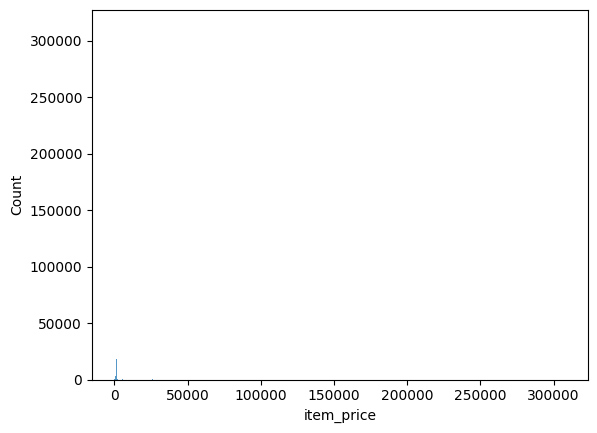

In [20]:
# здесь должно быть что-то похожее на нармальное распределение...
# из соображений базового понимания экономики

sns.histplot(train['item_price'])

# ps нужно чинить

In [67]:
  # Проверка привязанной почты GitHub
!git config --global user.name   # Проверка username

In [68]:
!git config --global user.email